<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_Arima_prophet_%EB%B9%84%EA%B5%90_lg%ED%99%94%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

## 라이브러리 설치

In [1]:
!pip install finance-datareader
!pip install pykrx

     |████████████████████████████████| 81 kB 5.7 MB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 
     |████████████████████████████████| 251 kB 70.6 MB/s 


## colab 이용 시 한글 폰트 설정

In [50]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 버전과 위치정보
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [51]:
# 설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔고딕 없음

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetyp

In [4]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [52]:
# 설치확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [6]:
# 나눔 폰트 설치경로
nanum_font

['/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts

In [53]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴
import matplotlib.pyplot as plt
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

Python 3.7.11
설정 폰트 글꼴: ['Malgun Gothic'], 설정 폰트 사이즈: 10.0


In [55]:
fm._rebuild()

In [54]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system...')

In [10]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
# 커널 다시시작

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


## 데이터 로드

In [1]:
def money_sur(stock_name, start, end):

  # 라이브러리를 찾음... 한방에 나옴...
    start_date = start
    end_date = end
    sample_code = stock_name

    dataset = fdr.DataReader(sample_code, start = start_date, end = end_date )
    dataset = dataset.reset_index()
    df = stock.get_market_fundamental_by_date(fromdate=start_date, todate=end_date, ticker=sample_code)
    df = df.reset_index()
    df.columns = ['Date','BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
    data = pd.merge(dataset, df, on='Date')

    return data

In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
lg_df = money_sur('051910', start = '20180101', end = end_date)

lg_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,407000,415000,406500,411000,153739,0.014815,188597,23.60,2.18,17417,1.22,5000
1,2018-01-03,404000,413000,404000,409500,103370,-0.003650,188597,23.51,2.17,17417,1.22,5000
2,2018-01-04,410000,412000,395000,395500,215698,-0.034188,188597,22.71,2.10,17417,1.26,5000
3,2018-01-05,396500,405500,395000,405000,154954,0.024020,188597,23.25,2.15,17417,1.23,5000
4,2018-01-08,409000,425000,407000,424500,321484,0.048148,188597,24.37,2.25,17417,1.18,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,748000,753000,740000,740000,267584,-0.010695,230440,111.01,3.21,6666,1.35,10000
912,2021-09-13,734000,747000,727000,747000,312766,0.009459,230440,112.06,3.24,6666,1.34,10000
913,2021-09-14,744000,748000,729000,734000,243009,-0.017403,230440,110.11,3.19,6666,1.36,10000
914,2021-09-15,723000,725000,706000,718000,457453,-0.021798,230440,107.71,3.12,6666,1.39,10000


## ARIMA 모수 설정

In [65]:
df1 = lg_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,411000
1,2018-01-03,409500
2,2018-01-04,395500
3,2018-01-05,405000
4,2018-01-08,424500
...,...,...
911,2021-09-10,740000
912,2021-09-13,747000
913,2021-09-14,734000
914,2021-09-15,718000


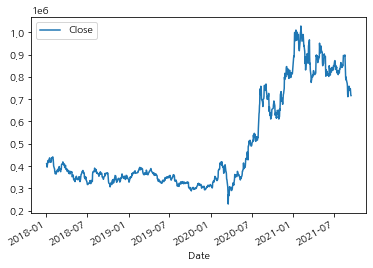

In [66]:
df1.plot('Date','Close')

In [67]:
df1.columns = ['Date', 'Price']

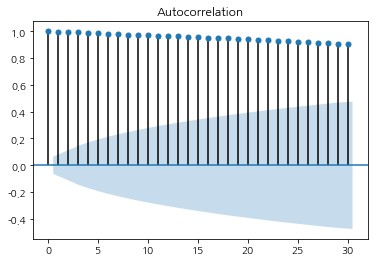

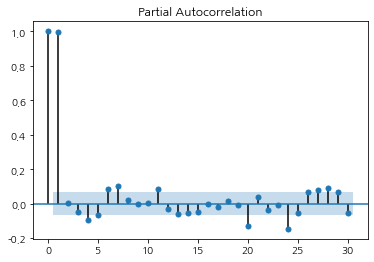

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1.Price)
plot_pacf(df1.Price)
plt.show()

ACF를 보면 완만하지만 꾸준히 줄어드는 것으로 보인다. 또한 PACF는 1의 Time lag에서 약 0.99를 보이고 이후에 급격히 감소한다.

In [69]:
# 시계열 정상성 검정 Augmented Dickey-Fuller Test
# 비정상성 확인

from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Price'])

print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF statistic: -0.7649978803777121
p-value: 0.8291881281899807


1차 차분 및 로그변환

In [70]:
x = df1['Price'].values
x = np.log(x)

dif = x[1:] - x[:-1] # 차분

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


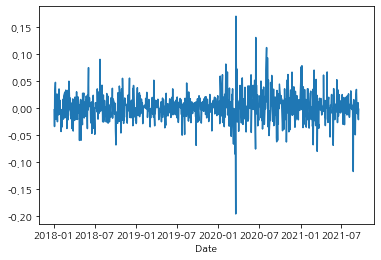

In [71]:
sns.lineplot(df1.iloc[1:, 0], dif)

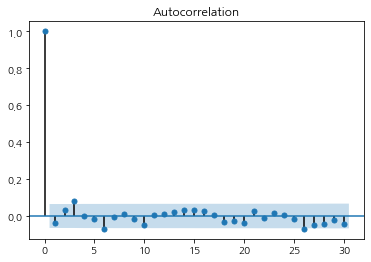

In [72]:
fig = plot_acf(dif)

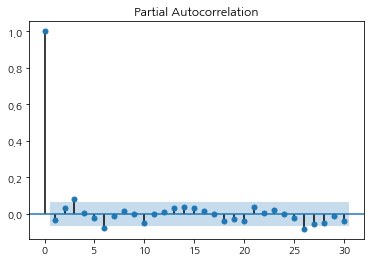

In [73]:
fig = plot_pacf(dif)

In [74]:
result_r = adfuller(dif)

print(f'ADF statistic: {result_r[0]}')
print(f'p-value: {result_r[1]}')  # 1차 차분으로는 안됨 2차 차분

ADF statistic: -15.856362568838334
p-value: 9.321288216145079e-29


In [75]:
dif = np.log(df1['Price'])
dif = dif.diff(2)[2:]
result_r = adfuller(dif)

print(f'ADF statistic: {result_r[0]}')
print(f'p-value: {result_r[1]}') # 2차 차분 

ADF statistic: -7.120197977732918
p-value: 3.73974952403304e-10


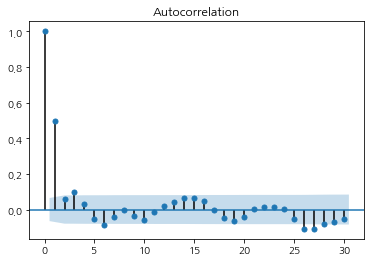

In [76]:
fig = plot_acf(dif)

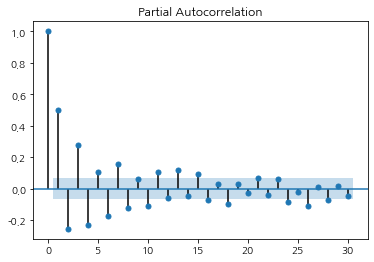

In [77]:
fig = plot_pacf(dif)

## Arima model

### AR MA 차수 설정

In [78]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# 2,2,0 으로 진행 const는 유의하지 않으므로 제외
model = ARIMA(df1.Price.values, order = (2,2,0))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  914
Model:                 ARIMA(2, 2, 0)   Log Likelihood              -10177.767
Method:                       css-mle   S.D. of innovations          16583.233
Date:                Thu, 16 Sep 2021   AIC                          20363.535
Time:                        07:06:36   BIC                          20382.806
Sample:                             2   HQIC                         20370.891
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5470    265.162     -0.002      0.998    -520.255     519.161
ar.L1.D2.y    -0.6980      0.031    -22.747      0.000      -0.758      -0.638
ar.L2.D2.y    -0.3722      0.031    -12.133      0.0

In [79]:
# 2,2,0 으로 진행 const는 유의하지 않으므로 제외
model = ARIMA(df1.Price.values, order = (2,2,0))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  914
Model:                 ARIMA(2, 2, 0)   Log Likelihood              -10177.767
Method:                       css-mle   S.D. of innovations          16583.234
Date:                Thu, 16 Sep 2021   AIC                          20361.535
Time:                        07:06:36   BIC                          20375.988
Sample:                             2   HQIC                         20367.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.6980      0.031    -22.747      0.000      -0.758      -0.638
ar.L2.D2.y    -0.3722      0.031    -12.133      0.000      -0.432      -0.312
                                    Roots           

### 모델 적합

In [80]:
# 학습, 테스트 데이터 분리
train = df1[:-10]
test = df1[-10:]

In [81]:
model = ARIMA(train.Price.values, order = (2,2,0))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  904
Model:                 ARIMA(2, 2, 0)   Log Likelihood              -10064.633
Method:                       css-mle   S.D. of innovations          16550.418
Date:                Thu, 16 Sep 2021   AIC                          20135.266
Time:                        07:06:36   BIC                          20149.686
Sample:                             2   HQIC                         20140.773
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.7065      0.031    -22.937      0.000      -0.767      -0.646
ar.L2.D2.y    -0.3767      0.031    -12.223      0.000      -0.437      -0.316
                                    Roots           

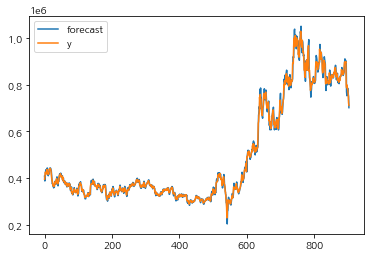

In [82]:
fig = model_fit.plot_predict()

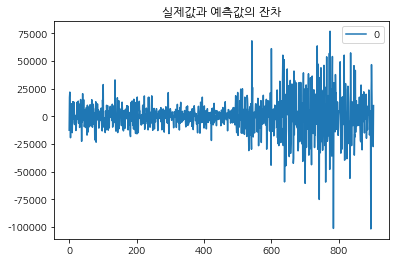

In [83]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [84]:
fore = model_fit.forecast(steps=10) # 10일 예측
print(fore)

(array([691342.94675951, 668337.30904663, 651335.17892194, 631353.1863665 ,
       611214.83112591, 592309.46415401, 572591.93308453, 552983.69935326,
       533604.19522508, 514021.92838602]), array([ 16550.41755768,  27059.93679095,  39149.60332506,  54663.27062569,
        70893.99800343,  88538.93206246, 107732.31411334, 127968.28328839,
       149370.11067348, 171891.38043835]), array([[658904.72441736, 723781.16910165],
       [615300.80751244, 721373.81058081],
       [574603.36639578, 728066.99144809],
       [524215.14466297, 738491.22807003],
       [472265.14831913, 750164.51393268],
       [418776.34608196, 765842.58222606],
       [361440.47745123, 783743.38871783],
       [302170.4729446 , 803796.92576191],
       [240844.1579383 , 826364.23251187],
       [177121.01347399, 850922.84329804]]))


## Arima 결과

In [85]:
# 마지막 10일의 예측 데이터
pred_arima_y = fore[0].tolist()

# 실제 10일의 데이터 
test_y = test.Price.values

# 신뢰구간
# 마지막 10일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in fore[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

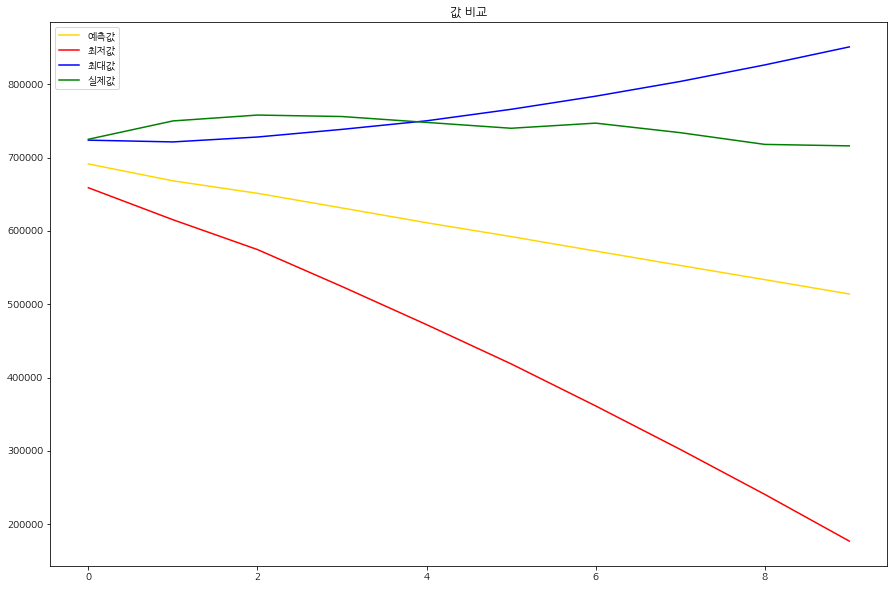

In [86]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))
print(rmse_arima)

146020.72129327606


# Prophet

## 데이터 로드

In [88]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
lg_df = money_sur('051910', start = '20180101', end = end_date)

lg_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,407000,415000,406500,411000,153739,0.014815,188597,23.60,2.18,17417,1.22,5000
1,2018-01-03,404000,413000,404000,409500,103370,-0.003650,188597,23.51,2.17,17417,1.22,5000
2,2018-01-04,410000,412000,395000,395500,215698,-0.034188,188597,22.71,2.10,17417,1.26,5000
3,2018-01-05,396500,405500,395000,405000,154954,0.024020,188597,23.25,2.15,17417,1.23,5000
4,2018-01-08,409000,425000,407000,424500,321484,0.048148,188597,24.37,2.25,17417,1.18,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,748000,753000,740000,740000,267584,-0.010695,230440,111.01,3.21,6666,1.35,10000
912,2021-09-13,734000,747000,727000,747000,312766,0.009459,230440,112.06,3.24,6666,1.34,10000
913,2021-09-14,744000,748000,729000,734000,243009,-0.017403,230440,110.11,3.19,6666,1.36,10000
914,2021-09-15,723000,725000,706000,718000,457453,-0.021798,230440,107.71,3.12,6666,1.39,10000


## Prophet 모델 실습

- Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측모델로, 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있다.
- fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피쳐를 'ds'와 'y'로 변경해야 한다. 
  - sesonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터
    - Additive는 데이터의 진폭이 일정함을 의미하고, Multiplicative는 데이터의 진폭이 점점 증가하거나 감소하는 것을 뜻함
  - changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터. 수치가 높을수록 모델은 과적합에 가까워진다.

In [89]:
df1 = lg_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,411000
1,2018-01-03,409500
2,2018-01-04,395500
3,2018-01-05,405000
4,2018-01-08,424500
...,...,...
911,2021-09-10,740000
912,2021-09-13,747000
913,2021-09-14,734000
914,2021-09-15,718000


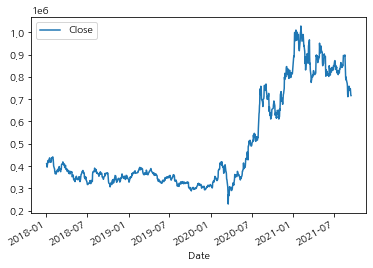

In [90]:
df1.plot('Date','Close')

In [91]:
df1.columns = ['ds', 'y']

In [92]:
# train, test
train = df1[:-10]
test = df1[-10:]

In [93]:
from fbprophet import Prophet

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.6)

prophet.fit(train)

In [94]:
# 10일단위로 예측값을 가져옴
future_data = prophet.make_future_dataframe(periods = 10, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
906,2021-09-03,734581.425988,706520.879795,759519.383513
907,2021-09-04,633174.236143,606564.749265,660114.443197
908,2021-09-05,624929.848154,597366.386156,651469.821598
909,2021-09-06,706869.906485,679592.562445,733548.854374
910,2021-09-07,698576.447626,672639.061387,725519.417222
911,2021-09-08,687997.568604,661705.303385,714870.949055
912,2021-09-09,685140.555423,659315.078684,711964.641945
913,2021-09-10,678429.859158,651411.141324,705555.875029
914,2021-09-11,579209.965331,551243.048407,606205.966205
915,2021-09-12,572189.596724,544873.837403,599714.263442


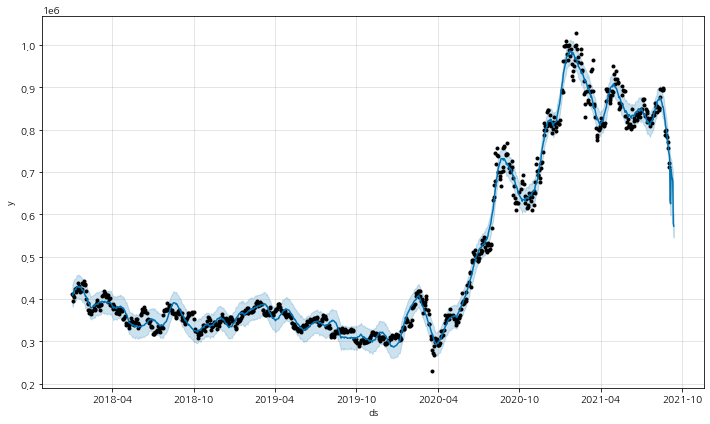

In [95]:
fig1 = prophet.plot(forecast_data)

그래프는 fbprophet에서 제공하는 트렌드 정보 시각화 그래프이다. 앞서 seasonality_mode 파라미터를 설정해놓은 경우에만 이 시각화가 가능

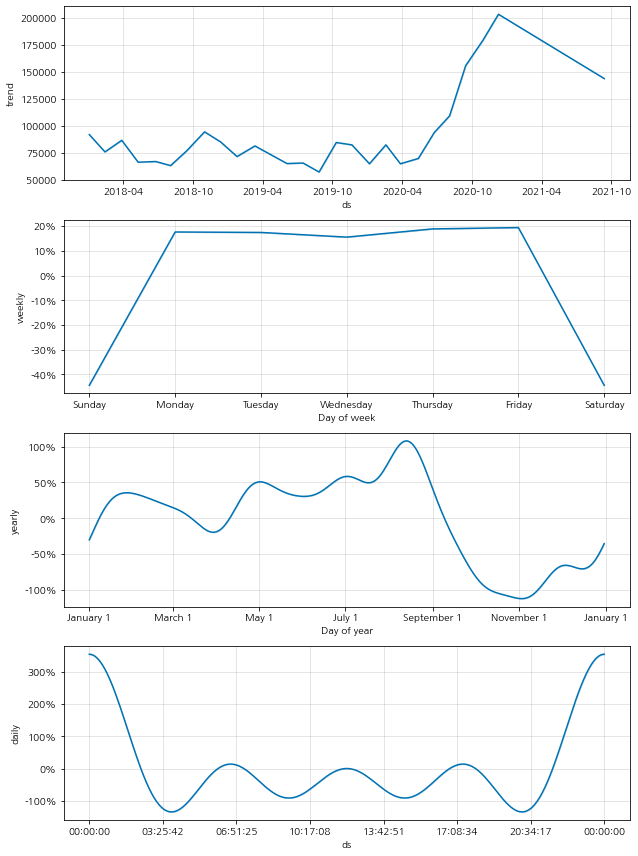

In [96]:
fig2 = prophet.plot_components(forecast_data)

## 결과

In [97]:
# test
test.y.values

array([725000, 750000, 758000, 756000, 748000, 740000, 747000, 734000,
       718000, 716000])

Text(0.5, 1.0, '값 비교')

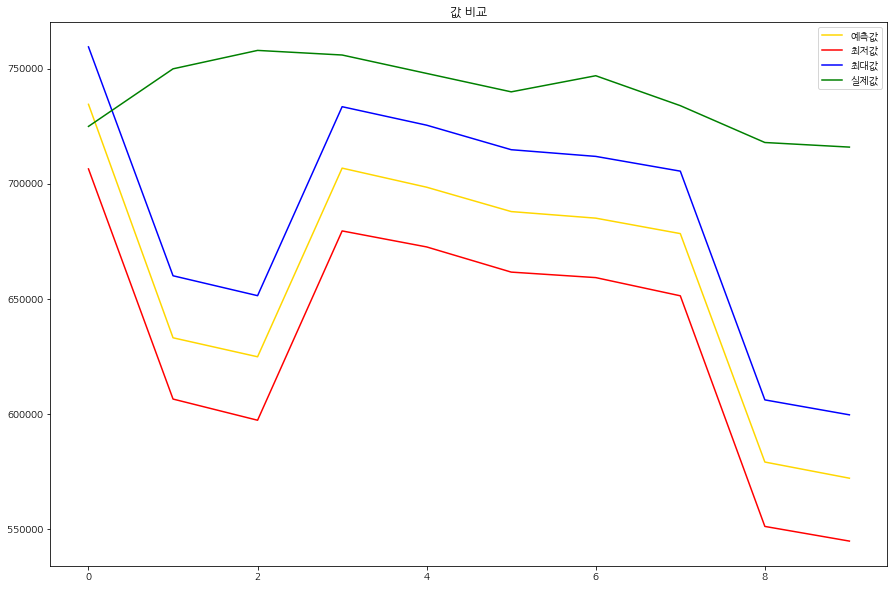

In [98]:
plt.figure(figsize=(15, 10))

# 마지막 10일의 예측 데이터
pred_fbprophet_y = forecast_data.yhat.values[-10:]

# 실제 10일의 데이터 
test_y = test.y.values

# 마지막 10일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-10:]
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-10:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [101]:
pred_fbprophet_y

array([734581.42598808, 633174.23614335, 624929.84815373, 706869.90648517,
       698576.44762593, 687997.56860397, 685140.55542346, 678429.85915806,
       579209.9653306 , 572189.59672448])

In [102]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

prophet_arima = sqrt(mean_squared_error(pred_fbprophet_y, test_y))
print(prophet_arima)

92664.54115599055


## 모델 비교

In [103]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})
df

,ARIMA 예측값,FBprophet 예측값,실제값
0,691342.946760,734581.425988,725000
1,668337.309047,633174.236143,750000
2,651335.178922,624929.848154,758000
3,631353.186367,706869.906485,756000
4,611214.831126,698576.447626,748000
5,592309.464154,687997.568604,740000
6,572591.933085,685140.555423,747000
7,552983.699353,678429.859158,734000
8,533604.195225,579209.965331,718000
9,514021.928386,572189.596724,716000


Text(0.5, 1.0, '값 비교')

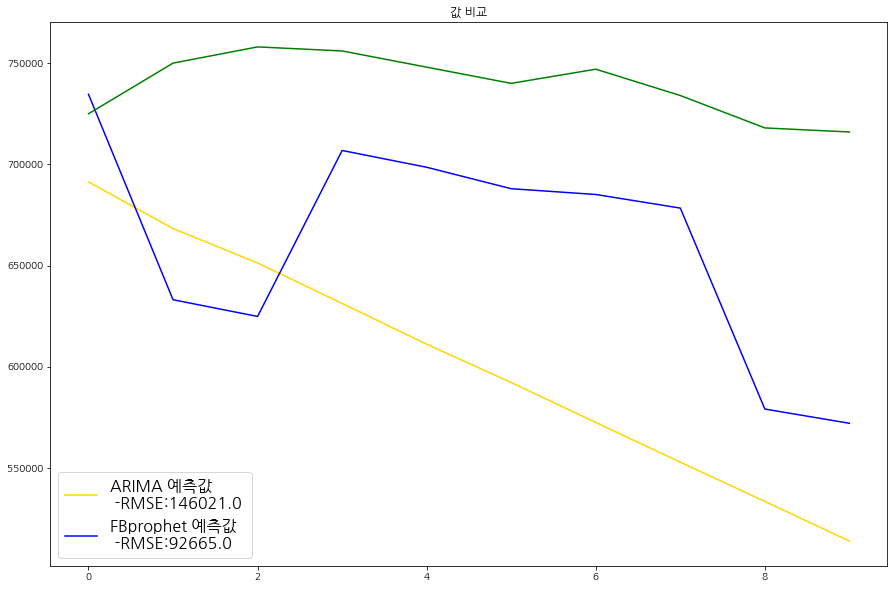

In [104]:
plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'blue')


# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet 예측값  \n -RMSE:' + str(round(rmse_fbprophet,0))])
plt.title("값 비교")